# Predict House Prices using california dataset 
1. Load Data
2. EDA(Null Values Handling, Correlation Analysis, Outliers)
3. Perprocess the data (Scaling, Test Test Split)
4. Train Regression Model
   a. Linear Regresion
   b. Decision Tree Regressor
   c. Random Forest
5. For each model:
   a. Train on Training Data
   b. Predict on Test Data
   c. Evaluate:
       i. MAE (Mean Absolute Error)
       ii. MSE (Mean Squared Error)
6. Find Important Features
7. Predict house prices for any arbitary values    

In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [4]:
data = fetch_california_housing()
df = pd.DataFrame(data['data'])

In [5]:
df.columns = data['feature_names']

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y=data['target']

In [8]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
print(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# EDA (Exploratory Data Analysis)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [12]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [13]:
correlation_matrix = df.corr()

<Axes: >

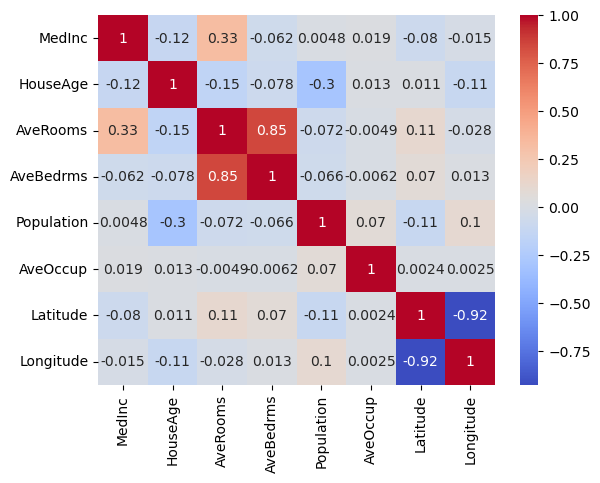

In [14]:
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing Outliers 
df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Pre-processing Data

In [16]:
"""
TrainTestSplit
we use 80% of data for training and 20% of our data for testing
to check if the model is good for us
"""

from sklearn.model_selection import train_test_split
X = df_clean
Y = y[X.index]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=52
)

In [17]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# Model Training 

In [18]:
# 1. Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)

LinearRegression()

In [19]:
# 2. Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=52)
dt.fit(X_train_scaled, Y_train)

DecisionTreeRegressor(random_state=52)

In [25]:
# 3. Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=52)
rfr.fit(X_train_scaled, Y_train)

RandomForestRegressor(random_state=52)

# Model Evaluation

In [27]:
# lr_p=lr.predict(X_test_scaled)
# dt_p=dt.predict(X_test_scaled)
# rfr_p=rfr.predict(X_test_scaled)

In [34]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# #Mean Absolute Error (MAE)
# lr_mae= mean_absolute_error(Y_test,lr_p)
# dt_mae= mean_absolute_error(Y_test,dt_p)
# rfr_mae= mean_absolute_error(Y_test,dt_p)
# #Mean Squared Error (MSE)
# lr_mse= mean_squared_error(Y_test, lr_p)
# dt_mse= mean_squared_error(Y_test, dt_p)
# rfr_mse= mean_squared_error(Y_test, dt_p)
# #r2 Score 

In [35]:
# print(f'For Linear Regression MAE is {lr_mae} and MSA is {lr_mse}')
# print(f'For Linear Regression MAE is {dt_mae} and MSA is {dt_mse}')
# print(f'For Linear Regression MAE is {rfr_mae} and MSA is {rfr_mse}')

For Linear Regression MAE is 0.47584403349379717 and MSA is 0.412881866311451
For Linear Regression MAE is 0.49550797269219354 and MSA is 0.5668492598200059
For Linear Regression MAE is 0.49550797269219354 and MSA is 0.5668492598200059


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
# Linear Regression Evaluation
lr_pred = lr.predict(X_test_scaled)
print("Linear Regression:")
print("MAE:", mean_absolute_error(Y_test, lr_pred))
print("MSE:", mean_squared_error(Y_test, lr_pred))
print("R2 Score:", r2_score(Y_test, lr_pred))
print()

Linear Regression:
MAE: 0.47584403349379717
MSE: 0.412881866311451
R2 Score: 0.6355680049866395



In [40]:
# Decision Tree Evaluation
dt_pred = dt.predict(X_test_scaled)
print("Decision Tree Regressor:")
print("MAE:", mean_absolute_error(Y_test, dt_pred))
print("MSE:", mean_squared_error(Y_test, dt_pred))
print("R2 Score:", r2_score(Y_test, dt_pred))
print()

Decision Tree Regressor:
MAE: 0.49550797269219354
MSE: 0.5668492598200059
R2 Score: 0.4996680080102558



In [43]:
# Random Forest Evaluation
rfr_pred = rfr.predict(X_test_scaled)
print("Random Forest Regressor:")
print("MAE:", mean_absolute_error(Y_test, rfr_pred))
print("MSE:", mean_squared_error(Y_test, rfr_pred))
print("R2 Score:", r2_score(Y_test, rfr_pred))

Random Forest Regressor:
MAE: 0.34859084312852484
MSE: 0.2727995974004437
R2 Score: 0.7592122356749578


# Decision Importance 

In [52]:
importances = rfr.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

      Feature  Importance
0      MedInc    0.432182
5    AveOccup    0.171324
7   Longitude    0.115107
6    Latitude    0.108445
1    HouseAge    0.061529
2    AveRooms    0.051015
4  Population    0.031551
3   AveBedrms    0.028847


# Predicting house prices for any arbitary values

In [50]:
# Example arbitrary input as a dictionary
input_data = {
    'MedInc': 5.0,
    'HouseAge': 20,
    'AveRooms': 5.5,
    'AveBedrms': 1.0,
    'Population': 1000,
    'AveOccup': 3.0,
    'Latitude': 34.0,
    'Longitude': -118.0
}

# Convert to DataFrame
input_df = pd.DataFrame([input_data])

# Scale it using the same scaler
input_scaled = scaler.transform(input_df)

# Predict using trained models
predicted_price_lr = lr.predict(input_scaled)
predicted_price_dt = dt.predict(input_scaled)
predicted_price_rfr = rfr.predict(input_scaled)

print(f"Predicted house price (in 100,000s): {predicted_price_lr[0]:.2f}")
print(f"Predicted house price (in 100,000s): {predicted_price_dt[0]:.2f}")
print(f"Predicted house price (in 100,000s): {predicted_price_rfr[0]:.2f}")

Predicted house price (in 100,000s): 2.36
Predicted house price (in 100,000s): 2.16
Predicted house price (in 100,000s): 2.23


# Extra
# Visulization of different algorithms 

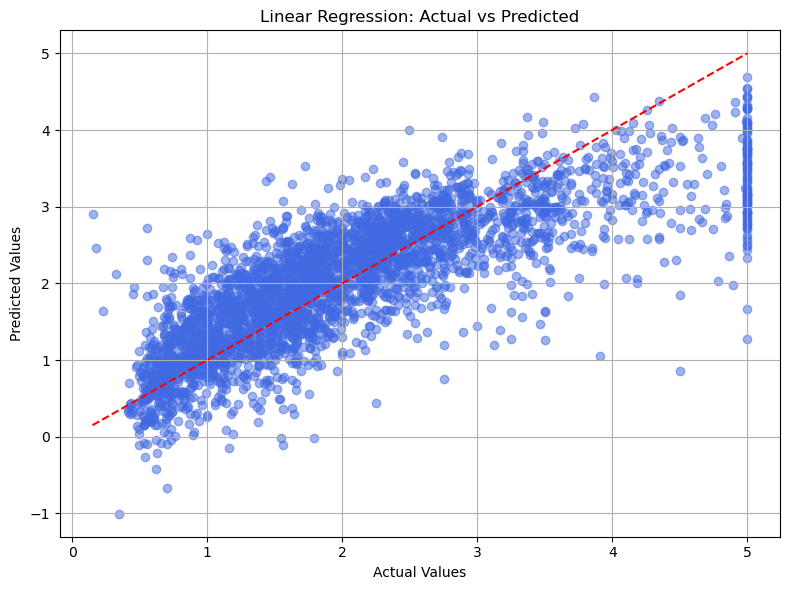

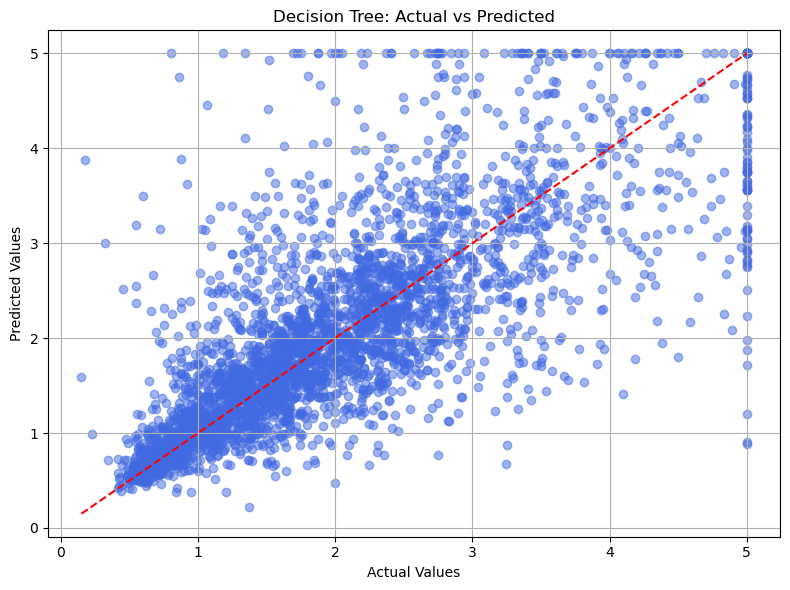

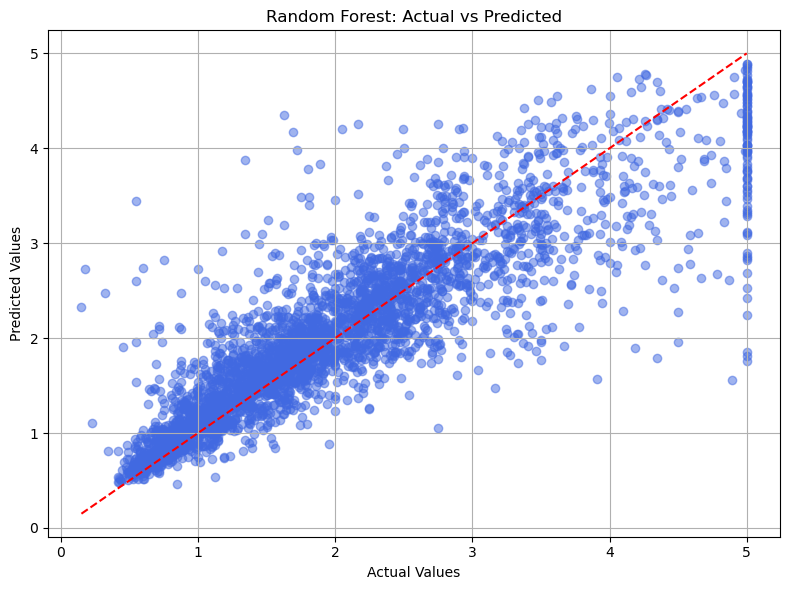

In [53]:
import matplotlib.pyplot as plt

# Function to plot actual vs predicted values
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, color='royalblue')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], '--r')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for Linear Regression
plot_predictions(Y_test, lr.predict(X_test_scaled), "Linear Regression: Actual vs Predicted")
# Plot for Decision Tree
plot_predictions(Y_test, dt.predict(X_test_scaled), "Decision Tree: Actual vs Predicted")
# Plot for Random Forest
plot_predictions(Y_test, rfr.predict(X_test_scaled), "Random Forest: Actual vs Predicted")

# Best Model

In [59]:
results = {
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MAE": [
        mean_absolute_error(Y_test, lr_pred),
        mean_absolute_error(Y_test, dt_pred),
        mean_absolute_error(Y_test, rfr_pred)
    ],
    "MSE": [
        mean_squared_error(Y_test, lr_pred),
        mean_squared_error(Y_test, dt_pred),
        mean_squared_error(Y_test, rfr_pred)
    ],
    "R2": [
        r2_score(Y_test, lr_pred),
        r2_score(Y_test, dt_pred),
        r2_score(Y_test, rfr_pred)
    ]
}

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2", ascending=False))

               Model       MAE       MSE        R2
2      Random Forest  0.348591  0.272800  0.759212
0  Linear Regression  0.475844  0.412882  0.635568
1      Decision Tree  0.495508  0.566849  0.499668
